<font size=6> <center> Clothing Classification Project </center></font>




In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import torchvision.models as models
from matplotlib import pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# Define image transformations for data augmentation and normalization

image_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Unzipping training dataset loaded to Google Colab

!unzip train.zip

Archive:  train.zip
   creating: train/pants/
  inflating: train/pants/0098b991-e36e-4ef1-b5ee-4154b21e2a92.jpg  
  inflating: train/pants/027c81f2-c6e1-498a-8f69-823ce631438e.jpg  
  inflating: train/pants/030a5708-f6d7-441f-86ee-0b51b33f3f51.jpg  
  inflating: train/pants/03383314-4e34-4604-8ba0-f5d75371204f.jpg  
  inflating: train/pants/03a43dea-405e-4a11-9716-2f790a95f699.jpg  
  inflating: train/pants/03b5fa92-c65d-4b45-820b-967e85f41ee2.jpg  
  inflating: train/pants/041cea74-d96a-45ff-a8e2-d311ee0f21d8.jpg  
  inflating: train/pants/05e280ef-53d9-497f-be09-e83c549f0a14.jpg  
  inflating: train/pants/062752a8-2cbd-434f-b850-4a4f85c32cb3.jpg  
  inflating: train/pants/06697086-d232-4c13-a5ea-ebd759b53bc6.jpg  
  inflating: train/pants/08973288-3d8b-4c07-9f2d-ce1392da54be.jpg  
  inflating: train/pants/08f602bc-a030-4f73-b0fb-0ddd986840aa.jpg  
  inflating: train/pants/0982f691-f2ce-469b-b81e-6842b914632c.jpg  
  inflating: train/pants/09cd286c-0fab-45b9-9152-322f32275ef7.jpg  
  

In [ ]:
# Training dataset path after unzipping

train_dataset_path = "/content/train"

In [ ]:
train_dataset = datasets.ImageFolder(root=train_dataset_path, transform=image_transforms)
len(train_dataset) # Get the number of samples in the training dataset

1863

In [ ]:
class_names = train_dataset.classes
class_names

['pants', 'shirt', 'shoes', 'skirt', 't-shirt']

In [ ]:
num_classes = len(train_dataset.classes)
num_classes

5

In [ ]:
# Unzipping validation dataset loaded to Google Colab

!unzip validation.zip

Archive:  validation.zip
   creating: validation/pants/
  inflating: validation/pants/012d1ca9-baaf-4b01-8b60-955f3408b1b7.jpg  
  inflating: validation/pants/0257eb81-f3d3-4704-8299-8b6ab20f1ed4.jpg  
  inflating: validation/pants/081b5ec1-13a6-43c8-991f-9ad2020f646a.jpg  
  inflating: validation/pants/0d0bb91d-01d7-45df-827d-da96bbc44b15.jpg  
  inflating: validation/pants/17bebe65-17cc-42b3-885f-4e6c64a16f26.jpg  
  inflating: validation/pants/19ff0603-c52b-4d27-a9b9-cfd9da5e9f35.jpg  
  inflating: validation/pants/1f3fe0f5-4724-43f8-bfce-6e22d1f1f5ba.jpg  
  inflating: validation/pants/24eb8ba7-065a-4493-8fa6-b3afa89751f6.jpg  
  inflating: validation/pants/2d88dcfb-2418-49fa-82b2-b5d4500ed542.jpg  
  inflating: validation/pants/2f03be8f-7053-4b94-b619-d5166b34ef3f.jpg  
  inflating: validation/pants/38dbb71c-2e31-4f17-af08-90719ad818d0.jpg  
  inflating: validation/pants/38e03d31-8068-4d73-82ac-c66334f907a5.jpg  
  inflating: validation/pants/3c8b71f9-ed39-4916-8fa1-ecc82a3d5986.j

In [ ]:
# Validation dataset path after unzipping

val_dataset_path = "/content/validation"

In [ ]:
val_dataset = datasets.ImageFolder(root=val_dataset_path, transform=image_transforms)
len(val_dataset) # Get the number of samples in the validation dataset

197

In [ ]:
class_names_val = val_dataset.classes
class_names_val

['pants', 'shirt', 'shoes', 'skirt', 't-shirt']

In [ ]:
# Create data loaders for training and validation

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [ ]:
# Inspect the shape of a single batch from the training data loader

for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [ ]:
images[1].shape

torch.Size([3, 224, 224])

In [ ]:
# Check the shape of a single image after transposing dimensions for visualization

images[1].permute(1,2,0).shape

torch.Size([224, 224, 3])

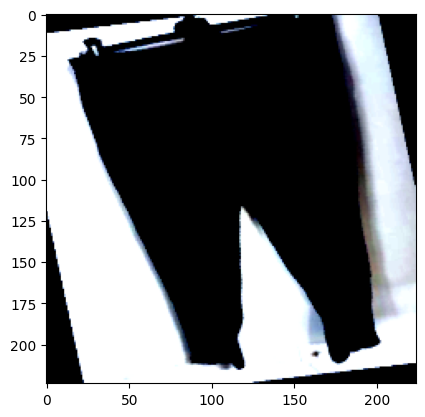

In [ ]:
# Plotting the image

plt.imshow(images[1].permute(1,2,0))
plt.show()

In [ ]:
# Display the label corresponding to the displayed image

labels[1]

tensor(0)

<font size = 4> Model 1: CNN </font>

In [ ]:
# Define a Convolutional Neural Network (CNN) model for clothes classification

class ClothesClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Flatten(),
            nn.Linear(64*28*28, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.network(x)
        return x

In [ ]:
# Get the batch size of the image tensor

images.size(0)

32

In [ ]:
len(train_loader.dataset)

1863

In [ ]:
   """
    Trains a given neural network model using the provided criterion and optimizer.

    Args:
        model (nn.Module): The neural network model to train.
        criterion (nn.Module): The loss function used for training.
        optimizer (optim.Optimizer): The optimization algorithm used for training.
        epochs (int): The number of training epochs.

    Returns:
        tuple: A tuple containing lists of all validation labels and predictions.
    """

def train_model(model, criterion, optimizer, epochs=5):
    start = time.time() # Record the start time

    for epoch in range(epochs):
        model.train() # Set the model to training mode
        running_loss = 0.0
        for batch_num, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)  # Move data to the device

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            if (batch_num+1) % 10 == 0: # Print batch loss every 10 batches
                print(f"Batch: {batch_num+1}, Epoch: {epoch+1}, Loss: {loss.item():0.2f}")

            running_loss += loss.item() * images.size(0) # Accumulate the loss

        epoch_loss = running_loss / len(train_loader.dataset) # Calculate average epoch loss
        print(f"Epoch [{epoch+1}/{epochs}], Avg Loss: {epoch_loss:.4f}")

        # Validation
        model.eval() # Set the model to evaluation mode
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []

        with torch.no_grad(): # Disable gradient calculation for validation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device) # Move data to the device
                outputs = model(images) # Get model predictions
                _, predicted = torch.max(outputs.data,1) # Get predicted class indices
                total += labels.size(0) # Accumulate the total number of samples
                correct += (predicted == labels).sum().item() # Count correct predictions
                all_labels.extend(labels.cpu().numpy()) # Store validation labels
                all_predictions.extend(predicted.cpu().numpy()) # Store validation predictions

            print(f"*** Validation Accuracy: {100 * correct / total:.2f}% ***") # Print validation accuracy

    end = time.time()  # Record the end time
    print(f"Execution time: {end - start} seconds") # Print the total execution time

    return all_labels, all_predictions

In [ ]:
# Instantiate the model, loss function, and optimizer
model = ClothesClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

all_labels, all_predictions = train_model(model, criterion, optimizer, epochs=10)

Batch: 10, Epoch: 1, Loss: 1.46
Batch: 20, Epoch: 1, Loss: 1.37
Batch: 30, Epoch: 1, Loss: 1.02
Batch: 40, Epoch: 1, Loss: 1.19
Batch: 50, Epoch: 1, Loss: 1.28
Epoch [1/10], Avg Loss: 1.4229
*** Validation Accuracy: 62.94% ***
Batch: 10, Epoch: 2, Loss: 0.87
Batch: 20, Epoch: 2, Loss: 1.04
Batch: 30, Epoch: 2, Loss: 0.99
Batch: 40, Epoch: 2, Loss: 0.76
Batch: 50, Epoch: 2, Loss: 0.62
Epoch [2/10], Avg Loss: 0.8507
*** Validation Accuracy: 72.59% ***
Batch: 10, Epoch: 3, Loss: 0.56
Batch: 20, Epoch: 3, Loss: 0.88
Batch: 30, Epoch: 3, Loss: 0.60
Batch: 40, Epoch: 3, Loss: 0.59
Batch: 50, Epoch: 3, Loss: 0.32
Epoch [3/10], Avg Loss: 0.6338
*** Validation Accuracy: 69.54% ***
Batch: 10, Epoch: 4, Loss: 0.55
Batch: 20, Epoch: 4, Loss: 0.69
Batch: 30, Epoch: 4, Loss: 0.61
Batch: 40, Epoch: 4, Loss: 0.29
Batch: 50, Epoch: 4, Loss: 0.44
Epoch [4/10], Avg Loss: 0.5568
*** Validation Accuracy: 76.65% ***
Batch: 10, Epoch: 5, Loss: 0.29
Batch: 20, Epoch: 5, Loss: 0.40
Batch: 30, Epoch: 5, Loss: 0

<font size = 4> Model 2: Transfer Learning with ResNet </font>

In [ ]:
# Load the pre-trained ResNet model
class ClothesClassifierResNet(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.5):
        super().__init__()
        self.model = models.resnet50(weights='DEFAULT')
        # Freeze all layers except those that will be explicitly unfrozen later
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze layer 4
        for param in self.model.layer4.parameters():
            param.requires_grad = True

        # Replace the final fully connected layer
        self.model.fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.model.fc.in_features, num_classes)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
# Instantiate the model, loss function, and optimizer

model = ClothesClassifierResNet(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

labels, predictions = train_model(model, criterion, optimizer, epochs=2)

Batch: 10, Epoch: 1, Loss: 0.30
Batch: 20, Epoch: 1, Loss: 0.53
Batch: 30, Epoch: 1, Loss: 0.51
Batch: 40, Epoch: 1, Loss: 0.16
Batch: 50, Epoch: 1, Loss: 0.10
Epoch [1/2], Avg Loss: 0.3615
*** Validation Accuracy: 97.46% ***
Batch: 10, Epoch: 2, Loss: 0.03
Batch: 20, Epoch: 2, Loss: 0.06
Batch: 30, Epoch: 2, Loss: 0.08
Batch: 40, Epoch: 2, Loss: 0.19
Batch: 50, Epoch: 2, Loss: 0.01
Epoch [2/2], Avg Loss: 0.1108
*** Validation Accuracy: 97.46% ***
Execution time: 1430.095972776413 seconds


<font size = 4> Model Evaluation using Classification Report and Confusion Matrix </font>

In [31]:
from sklearn.metrics import classification_report

report = classification_report(labels, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      0.93      0.96        29
           2       1.00      0.96      0.98        26
           3       0.92      0.92      0.92        12
           4       0.95      0.99      0.97        81

    accuracy                           0.97       197
   macro avg       0.97      0.96      0.97       197
weighted avg       0.98      0.97      0.97       197



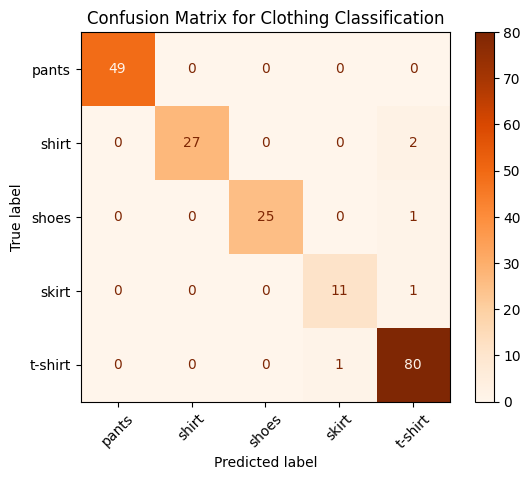

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

conf_matrix = confusion_matrix(labels, predictions, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Oranges, xticks_rotation=45)
plt.title("Confusion Matrix for Clothing Classification")
plt.show()

<font size = 4>Saving the model </font>

In [33]:
torch.save(model.state_dict(), 'saved_model.pth')